In [2]:
import torch
inputs = torch.tensor(
 [[0.43, 0.15, 0.89], # Your    (x^1)
 [0.55, 0.87, 0.66], # journey  (x^2)
 [0.57, 0.85, 0.64], # starts   (x^3)
 [0.22, 0.58, 0.33], # with     
[0.77, 0.25, 0.10], # one      
[0.05, 0.80, 0.55]] # step     
)

In [3]:
import torch
print("PyTorch version:", torch.__version__)
print("CUDA available:", torch.cuda.is_available())
print("CUDA version PyTorch was compiled with:", torch.version.cuda)

PyTorch version: 2.8.0+cpu
CUDA available: False
CUDA version PyTorch was compiled with: None


In [4]:
# The intermediate attention scores are calculated by taking the dot product of each input vector with the query vector.
query = inputs[1]                                               
attn_scores_2 = torch.empty(inputs.shape[0])
print(attn_scores_2)
for i, x_i in enumerate(inputs):
    attn_scores_2[i] = torch.dot(x_i, query)
print(attn_scores_2)
print(query)

tensor([0., 0., 0., 0., 0., 0.])
tensor([0.9544, 1.4950, 1.4754, 0.8434, 0.7070, 1.0865])
tensor([0.5500, 0.8700, 0.6600])


In [5]:
res = 0.
for idx, element in enumerate(inputs[0]):
     res += inputs[0][idx] * query[idx]
print(res)
print(torch.dot(inputs[0], query))
print(" The outputs confirms that the sum of the element-wise multiplication gives the same results as the dot product:")

tensor(0.9544)
tensor(0.9544)
 The outputs confirms that the sum of the element-wise multiplication gives the same results as the dot product:


In [6]:
import torch
print("PyTorch version:", torch.__version__)
print("CUDA available:", torch.cuda.is_available())
print("CUDA version PyTorch was compiled with:", torch.version.cuda)
print("Number of GPUs:", torch.cuda.device_count())
if torch.cuda.is_available():
    print("Current GPU:", torch.cuda.get_device_name(0))
    print("GPU Memory:", torch.cuda.get_device_properties(0).total_memory / 1024**3, "GB")

PyTorch version: 2.8.0+cpu
CUDA available: False
CUDA version PyTorch was compiled with: None
Number of GPUs: 0


In [7]:
attn_weights_2 = torch.softmax(attn_scores_2, dim=0)
print("Attention weights:", attn_weights_2)
print("Sum:", attn_weights_2.sum())

Attention weights: tensor([0.1385, 0.2379, 0.2333, 0.1240, 0.1082, 0.1581])
Sum: tensor(1.)


Query: tensor([0.5500, 0.8700, 0.6600])
Context vector is the weighted sum of the input vectors and the attention weights.
context vector initialization: tensor([0., 0., 0.])
Final context vector: tensor([0.4419, 0.6515, 0.5683])


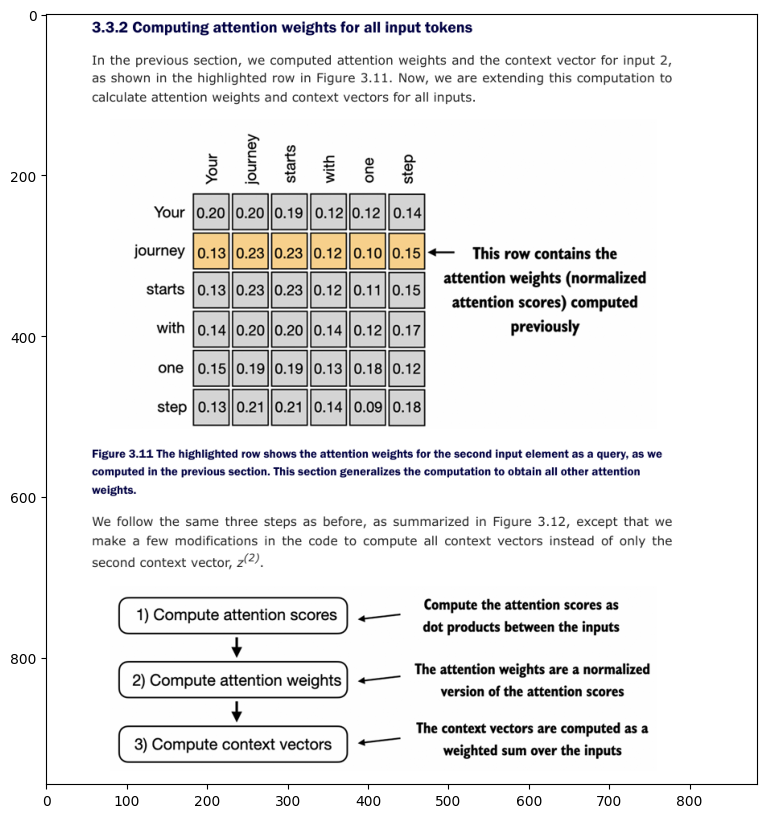

In [8]:
query = inputs[1] # 2nd input token is the query
print("Query:", query)
context_vec_2 = torch.zeros(query.shape)
print("Context vector is the weighted sum of the input vectors and the attention weights.")
print("context vector initialization:", context_vec_2)
for i,x_i in enumerate(inputs):
    context_vec_2 += attn_weights_2[i]*x_i
print("Final context vector:",context_vec_2)


import matplotlib.pyplot as plt
img=plt.imread('image.png')
plt.figure(figsize=(12,10))
plt.imshow(img)

In [9]:
# Lets calculate the context vector for the entire sequence in one go.
# We can do this by matrix multiplication of the attention weights with the input matrix.


#Step1
#First lets calculate the attention scores for all queries in one go.
attn_scores = torch.empty(6, 6)
for i, x_i in enumerate(inputs):
    for j, x_j in enumerate(inputs):
       attn_scores[i, j] = torch.dot(x_i, x_j)
print(attn_scores)

print("===="*30)
# Insted of using for loop because the for loops are slow in python so we can use matrix multiplication to calculate the attention scores for all queries in one go.
attn_scores = inputs @ inputs.T
print(attn_scores)
print("We can visually confirm that both methods give the same results.")

tensor([[0.9995, 0.9544, 0.9422, 0.4753, 0.4576, 0.6310],
        [0.9544, 1.4950, 1.4754, 0.8434, 0.7070, 1.0865],
        [0.9422, 1.4754, 1.4570, 0.8296, 0.7154, 1.0605],
        [0.4753, 0.8434, 0.8296, 0.4937, 0.3474, 0.6565],
        [0.4576, 0.7070, 0.7154, 0.3474, 0.6654, 0.2935],
        [0.6310, 1.0865, 1.0605, 0.6565, 0.2935, 0.9450]])
tensor([[0.9995, 0.9544, 0.9422, 0.4753, 0.4576, 0.6310],
        [0.9544, 1.4950, 1.4754, 0.8434, 0.7070, 1.0865],
        [0.9422, 1.4754, 1.4570, 0.8296, 0.7154, 1.0605],
        [0.4753, 0.8434, 0.8296, 0.4937, 0.3474, 0.6565],
        [0.4576, 0.7070, 0.7154, 0.3474, 0.6654, 0.2935],
        [0.6310, 1.0865, 1.0605, 0.6565, 0.2935, 0.9450]])
We can visually confirm that both methods give the same results.


In [10]:
#Step2
#Lets now normalize the attention scores using softmax.
attn_weights = torch.softmax(attn_scores, dim=-1)
print(attn_weights)
print("By setting dim=-1, we are instructing the softmax function to apply the normalization along the last dimension of the attn_scores tensor.")

tensor([[0.2098, 0.2006, 0.1981, 0.1242, 0.1220, 0.1452],
        [0.1385, 0.2379, 0.2333, 0.1240, 0.1082, 0.1581],
        [0.1390, 0.2369, 0.2326, 0.1242, 0.1108, 0.1565],
        [0.1435, 0.2074, 0.2046, 0.1462, 0.1263, 0.1720],
        [0.1526, 0.1958, 0.1975, 0.1367, 0.1879, 0.1295],
        [0.1385, 0.2184, 0.2128, 0.1420, 0.0988, 0.1896]])
By setting dim=-1, we are instructing the softmax function to apply the normalization along the last dimension of the attn_scores tensor.


In [11]:
row_2_sum = sum([0.1385, 0.2379, 0.2333, 0.1240, 0.1082, 0.1581])
print("Row 2 sum:", row_2_sum)
print("All row sums:", attn_weights.sum(dim=-1))
print("We can see that all row sums equal 1, confirming that the attention weights are properly normalized.")

Row 2 sum: 1.0
All row sums: tensor([1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000])
We can see that all row sums equal 1, confirming that the attention weights are properly normalized.


In [12]:
inputs.shape, attn_weights.shape
print("The input matrix has shape:", inputs.shape)
print("The attention weights matrix has shape:", attn_weights.shape)
print("The resulting context vector matrix will have shape (6, 3), matching the input matrix shape.")

The input matrix has shape: torch.Size([6, 3])
The attention weights matrix has shape: torch.Size([6, 6])
The resulting context vector matrix will have shape (6, 3), matching the input matrix shape.


In [13]:
print("Got the final self attention context vectors by multiplying the attention weights with the input matrix:")
all_context_vecs = attn_weights @ inputs
print(all_context_vecs)


Got the final self attention context vectors by multiplying the attention weights with the input matrix:
tensor([[0.4421, 0.5931, 0.5790],
        [0.4419, 0.6515, 0.5683],
        [0.4431, 0.6496, 0.5671],
        [0.4304, 0.6298, 0.5510],
        [0.4671, 0.5910, 0.5266],
        [0.4177, 0.6503, 0.5645]])


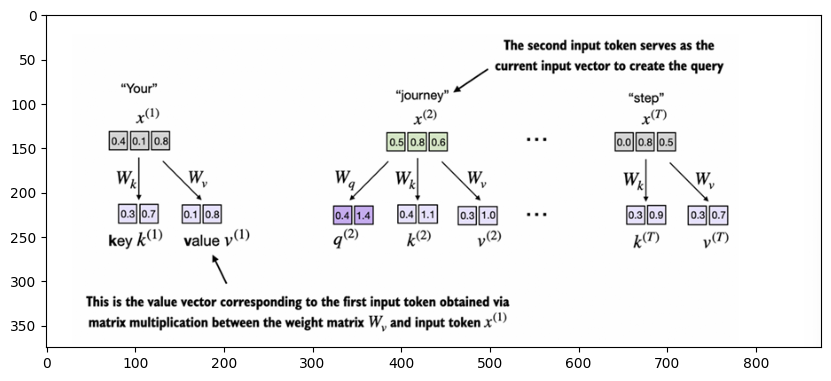

In [14]:
"""
In the next section,
we will add trainable weights, enabling the LLM to learn from data and improve its performance on specific tasks.
Basically extending the attention mechanism to include learnable parameters.


The most notable difference is the introduction of weight matrices that are updated
 during model training. These trainable weight matrices are crucial so that the model
 (specifically, the attention module inside the model) can learn to produce "good" context
 vectors.
"""

# We will implement the self-attention mechanism step by step by introducing the three
#  trainable weight matrices Wq, Wk, and Wv. These three matrices are used to project the
#  embedded input tokens, x(i), into query, key, and value vectors 

img = plt.imread('image2.png')
plt.figure(figsize=(10, 6))
plt.imshow(img)


🔑 In Attention (like in Transformers)

For each input token (word, pixel, etc.), the model creates three vectors:

Query (Q)

Key (K)

Value (V)

They are all just different learned projections of the same input embedding.

Imagine you are reading a sentence and want to see which words are relevant to a particular word.

Query — represents what this word is looking for (what information it needs)

Key — represents what this word contains (what information it offers)

Value — represents the actual content of this word (what information will be passed on if chosen)

In [15]:
"""
What is a Query?

The query is a vector that represents what the current token is "looking for" in other tokens.

It captures the information need of the current token.

For example, if the current token is "journey", its query vector q^(2) encodes: 
"what kind of information am I seeking from the other tokens (like 'your', 'step' etc.)?" 

Key Points about Queries:
- Each token has its own query vector
- The query determines what information that token wants to gather
- Queries are compared against keys to compute attention scores
- Higher attention scores mean the query finds that information more relevant
- This allows tokens to selectively focus on relevant context from other tokens

In our example:
- inputs[1] = [0.55, 0.87, 0.66] represents "journey" 
- This becomes the query vector when we want to compute attention for the "journey" token
- The query asks: "What context should I pay attention to?"
"""

# Example: Let's see how the query "journey" attends to different tokens
print("Query token (journey):", inputs[1])
print("Attention scores with all tokens:", attn_scores_2)
print("Normalized attention weights:", attn_weights_2)
print("\nThis shows how much 'journey' pays attention to each token:")
tokens = ["Your", "journey", "starts", "with", "one", "step"]
for i, (token, weight) in enumerate(zip(tokens, attn_weights_2)):
    print(f"  {token}: {weight.item():.4f}")

Query token (journey): tensor([0.5500, 0.8700, 0.6600])
Attention scores with all tokens: tensor([0.9544, 1.4950, 1.4754, 0.8434, 0.7070, 1.0865])
Normalized attention weights: tensor([0.1385, 0.2379, 0.2333, 0.1240, 0.1082, 0.1581])

This shows how much 'journey' pays attention to each token:
  Your: 0.1385
  journey: 0.2379
  starts: 0.2333
  with: 0.1240
  one: 0.1082
  step: 0.1581


In [16]:
x_2 = inputs[1]                                                   
d_in = inputs.shape[1]                                            
d_out = 2                                                         
#A The second input element
#B The input embedding size, d=3
#C The output embedding size, d_out=2

In [17]:
torch.manual_seed(123)
W_query = torch.nn.Parameter(torch.rand(d_in, d_out), requires_grad=False)
W_key = torch.nn.Parameter(torch.rand(d_in, d_out), requires_grad=False)
W_value = torch.nn.Parameter(torch.rand(d_in, d_out), requires_grad=False)
"""
when : requires_grad=False
→ PyTorch will not track gradients for this tensor.
→ It will be treated as just fixed data.
→ It will not be updated during training.
"""

'\nwhen : requires_grad=False\n→ PyTorch will not track gradients for this tensor.\n→ It will be treated as just fixed data.\n→ It will not be updated during training.\n'

In [18]:
print(f"Wq: {W_query}")
print(f"Wk: {W_key}")
print(f"Wv: {W_value}")

Wq: Parameter containing:
tensor([[0.2961, 0.5166],
        [0.2517, 0.6886],
        [0.0740, 0.8665]])
Wk: Parameter containing:
tensor([[0.1366, 0.1025],
        [0.1841, 0.7264],
        [0.3153, 0.6871]])
Wv: Parameter containing:
tensor([[0.0756, 0.1966],
        [0.3164, 0.4017],
        [0.1186, 0.8274]])


In [19]:
 # these are the direct matrix multiplications to get the query, key and value vectors
query_2 = x_2 @ W_query
key_2 = x_2 @ W_key 
value_2 = x_2 @ W_value
print(query_2)

tensor([0.4306, 1.4551])


In [20]:
keys=inputs @ W_key
values=inputs @ W_value
print("keys.shape :", keys.shape)
print("values.shape :", values.shape)
print("As we can tell from the outputs, we successfully projected the 6 input tokens from a 3D onto a 2D embedding space:")

keys.shape : torch.Size([6, 2])
values.shape : torch.Size([6, 2])
As we can tell from the outputs, we successfully projected the 6 input tokens from a 3D onto a 2D embedding space:


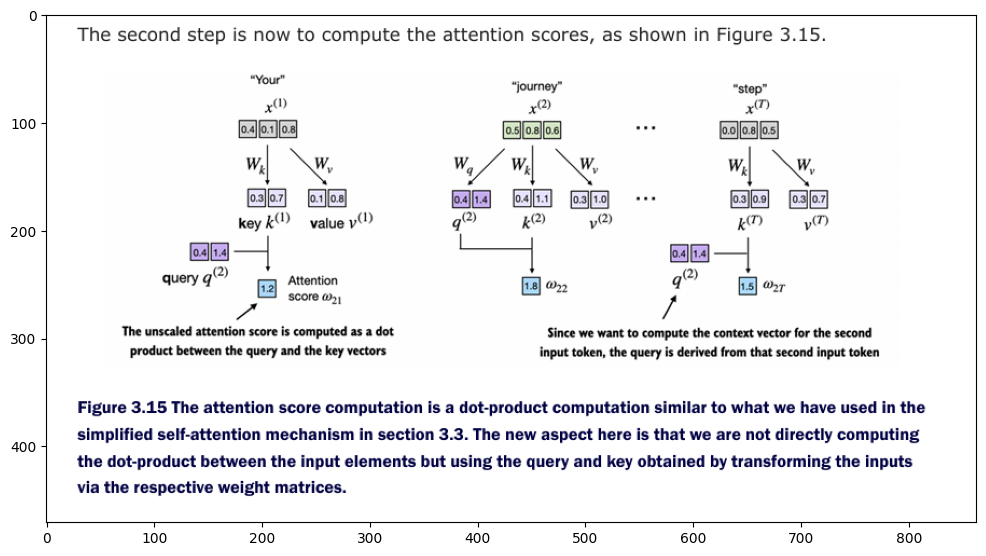

In [21]:
img=plt.imread("images/image copy.png")
plt.figure(figsize=(12,10))
plt.imshow(img)

attn_score_22=Q2​⋅K2​
tensor(1.8524)


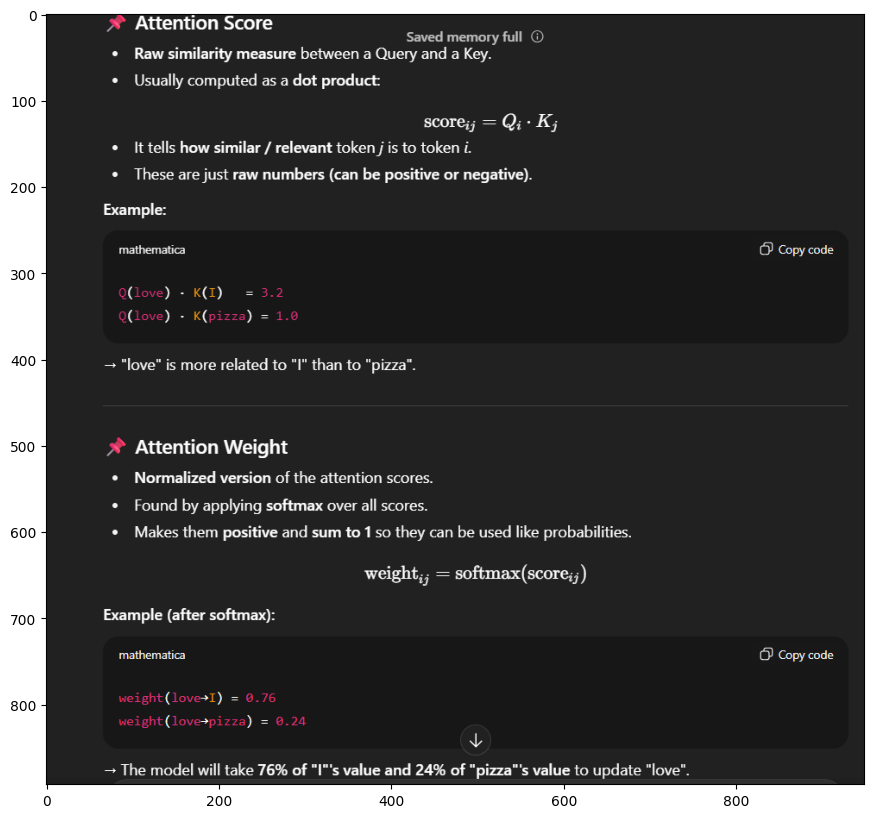

In [22]:
# The second step is now to compute the attention scores
#This keys_2 is the key of the second token "journey"
keys_2=keys[1]
print("attn_score_22=Q2​⋅K2​")
attn_score_22=query_2.dot(keys_2)
print(attn_score_22)
img2=plt.imread("images\image.png")
plt.figure(figsize=(12,10))
plt.imshow(img2)

In [23]:
attn_scores_2 = query_2 @ keys.T # All attention scores for given query with all keys of all tokens
print(attn_scores_2)
# Now as we have calculated the attention scores for the query of the second token "journey"
# with all keys of all tokens, we can now normalize these attention scores using softmax to get the attention weights.


tensor([1.2705, 1.8524, 1.8111, 1.0795, 0.5577, 1.5440])


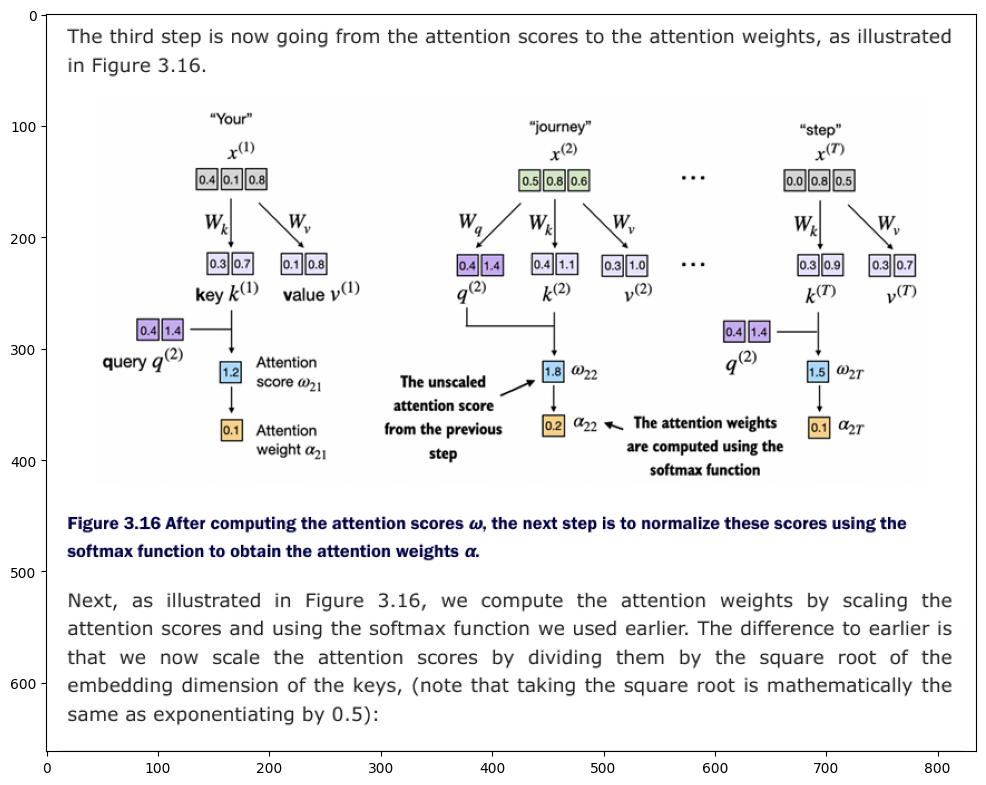

In [24]:
img3=plt.imread("images\Screenshot 2025-09-18 154203.png")
plt.figure(figsize=(12,10))
plt.imshow(img3)

In [25]:
#Lets get the attention weights by normalizing the attention scores using softmax
d_k=keys.shape[-1]
attn_weights_2 = torch.softmax(attn_scores_2 / d_k**0.5, dim=-1)
print(attn_weights_2)

tensor([0.1500, 0.2264, 0.2199, 0.1311, 0.0906, 0.1820])


In [26]:
# Now to get the final context vector we have to multiply this attention weight to t
context_vec_2 = attn_weights_2 @ values
print("Context Vector 2:", context_vec_2)

Context Vector 2: tensor([0.3061, 0.8210])


In [27]:
import torch.nn as nn
class SelfAttention_V1(nn.Module):
    def __init__(self,d_in,d_out):
        super(SelfAttention_V1,self).__init__()
        self.d_out=d_out
        self.W_query = nn.Parameter(torch.rand(d_in, d_out))
        self.W_key = nn.Parameter(torch.rand(d_in, d_out))
        self.W_value = nn.Parameter(torch.rand(d_in, d_out))
    
    def forward(self,inputs):
        keys=inputs @ self.W_key
        queries=inputs @ self.W_query
        values=inputs @ self.W_value
        attn_scores = queries @ keys.T
        attn_weights= torch.softmax(attn_scores / self.d_out**0.5, dim=-1)
        context_vecs = attn_weights @ values
        return context_vecs


In [28]:
torch.manual_seed(123)
sa_v1=SelfAttention_V1(d_in,d_out)
print(sa_v1(inputs))

tensor([[0.2996, 0.8053],
        [0.3061, 0.8210],
        [0.3058, 0.8203],
        [0.2948, 0.7939],
        [0.2927, 0.7891],
        [0.2990, 0.8040]], grad_fn=<MmBackward0>)


In [29]:
# We can improve the SelfAttention_v1 implementation further by utilizing PyTorch's
#  nn.Linear layers, which effectively perform matrix multiplication when the bias units are
#  disabled. Additionally, a significant advantage of using nn.Linear instead of manually
#  implementing nn.Parameter(torch.rand(...)) is that nn.Linear has an optimized weight
#  initialization scheme, contributing to more stable and effective model training.

class SelfAttention_v2(nn.Module):
    def __init__(self, d_in, d_out, qkv_bias=False):
        super().__init__()
        self.d_out = d_out
        self.W_query = nn.Linear(d_in, d_out, bias=qkv_bias)
        self.W_key = nn.Linear(d_in, d_out, bias=qkv_bias)
        self.W_value = nn.Linear(d_in, d_out, bias=qkv_bias)

    def forward(self, x):

        keys = self.W_key(x)
        queries = self.W_query(x)
        values = self.W_value(x)
        attn_scores = queries @ keys.T
        attn_weights = torch.softmax(attn_scores / keys.shape[-1]**0.5, dim=-1)
        context_vec = attn_weights @ values
        return context_vec

In [30]:
torch.manual_seed(789)
sa_v2=SelfAttention_v2(d_in, d_out)
print(sa_v2(inputs))
# Note that SelfAttention_v1 and SelfAttention_v2 give different outputs because they
#  use different initial weights for the weight matrices since nn.Linear uses a more
#  sophisticated weight initialization scheme.

tensor([[-0.0739,  0.0713],
        [-0.0748,  0.0703],
        [-0.0749,  0.0702],
        [-0.0760,  0.0685],
        [-0.0763,  0.0679],
        [-0.0754,  0.0693]], grad_fn=<MmBackward0>)


Casual Attention using mask 

Figure 3.19 In causal attention, we mask out the attention weights above the diagonal such that for a given input, the LLM can't access future tokens when computing the context vectors using the attention weights. For example, for the word "journey" in the second row, we only keep the attention weights for the words before ("Your") and in the current position ("journey").


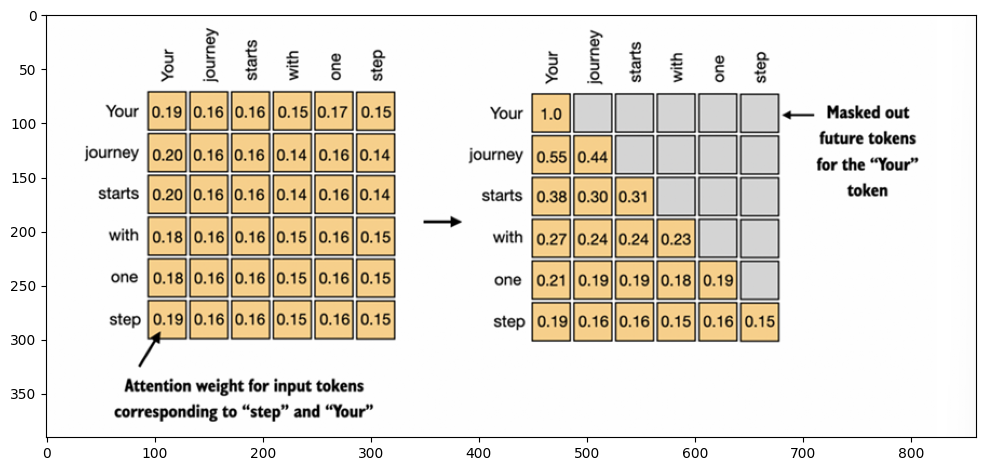

In [31]:
#  Causal attention, also known as masked attention, is a specialized form of self-attention.
#  It restricts a model to only consider previous and current inputs in a sequence when
#  processing any given token. This is in contrast to the standard self-attention mechanism,
#  which allows access to the entire input sequence at once.
#  Consequently, when computing attention scores, the causal attention mechanism
#  ensures that the model only factors in tokens that occur at or before the current token in
#  the sequence.
#  To achieve this in GPT-like LLMs, for each token processed, we mask out the future
#  tokens, which come after the current token in the input text,
plt.figure(figsize=(12,10))
img=plt.imread("images/Screenshot 2025-09-28 202522.png")
plt.imshow(img)
print("Figure 3.19 In causal attention, we mask out the attention weights above the diagonal such that for a given input, the LLM can't access future tokens when computing the context vectors using the attention weights. For example, for the word \"journey\" in the second row, we only keep the attention weights for the words before (\"Your\") and in the current position (\"journey\").")

In [32]:
#  As illustrated in Figure 3.19, we mask out the attention weights above the diagonal, and we
#  normalize the non-masked attention weights, such that the attention weights sum to 1 in
#  each row. In the next section, we will implement this masking and normalization procedure
#  in code.


# Lest implement casual self attention in code using mask and normalization.

In [33]:
queries = sa_v2.W_query(inputs)
print("Queries:")
print("Shape of queries:", queries.shape)
print(queries)
keys = sa_v2.W_key(inputs)
print("Keys:")
print("Shape of keys:", keys.shape)
print(keys)
values = sa_v2.W_value(inputs)
print("Values:")
print("Shape of values:", values.shape)
print(values)
attn_scores = queries @ keys.T
print("Attention Scores:")
print("Shape of attention scores:", attn_scores.shape)
print(attn_scores)
attn_weights = torch.softmax(attn_scores / keys.shape[-1]**0.5, dim=-1)
print("Attention Weights:")
print("Shape of attention weights:", attn_weights.shape)
print(attn_weights)

Queries:
Shape of queries: torch.Size([6, 2])
tensor([[ 0.6600, -0.2047],
        [ 0.9091, -0.4471],
        [ 0.8960, -0.4419],
        [ 0.5034, -0.2633],
        [ 0.4088, -0.2232],
        [ 0.6628, -0.3292]], grad_fn=<MmBackward0>)
Keys:
Shape of keys: torch.Size([6, 2])
tensor([[ 0.3147, -0.4016],
        [-0.0298, -0.4459],
        [-0.0170, -0.4262],
        [-0.1054, -0.2724],
        [ 0.2185,  0.0482],
        [-0.2258, -0.4782]], grad_fn=<MmBackward0>)
Values:
Shape of values: torch.Size([6, 2])
tensor([[-0.0872,  0.0286],
        [-0.1137,  0.0766],
        [-0.1018,  0.0927],
        [-0.0912, -0.0026],
        [ 0.1395,  0.3580],
        [-0.2085, -0.1546]], grad_fn=<MmBackward0>)
Attention Scores:
Shape of attention scores: torch.Size([6, 6])
tensor([[ 0.2899,  0.0716,  0.0760, -0.0138,  0.1344, -0.0511],
        [ 0.4656,  0.1723,  0.1751,  0.0259,  0.1771,  0.0085],
        [ 0.4594,  0.1703,  0.1731,  0.0259,  0.1745,  0.0090],
        [ 0.2642,  0.1024,  0.1036,  0

In [34]:
attn_weights

tensor([[0.1921, 0.1646, 0.1652, 0.1550, 0.1721, 0.1510],
        [0.2041, 0.1659, 0.1662, 0.1496, 0.1665, 0.1477],
        [0.2036, 0.1659, 0.1662, 0.1498, 0.1664, 0.1480],
        [0.1869, 0.1667, 0.1668, 0.1571, 0.1661, 0.1564],
        [0.1830, 0.1669, 0.1670, 0.1588, 0.1658, 0.1585],
        [0.1935, 0.1663, 0.1666, 0.1542, 0.1666, 0.1529]],
       grad_fn=<SoftmaxBackward0>)

In [35]:
# Lets apply the mask on this matrix to make it casual self attention
context_length=attn_scores.shape[0]
mark_simple=torch.tril(torch.ones((context_length,context_length)))
print(mark_simple)

tensor([[1., 0., 0., 0., 0., 0.],
        [1., 1., 0., 0., 0., 0.],
        [1., 1., 1., 0., 0., 0.],
        [1., 1., 1., 1., 0., 0.],
        [1., 1., 1., 1., 1., 0.],
        [1., 1., 1., 1., 1., 1.]])


In [36]:
masked_simple=attn_weights*mark_simple
masked_simple

tensor([[0.1921, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000],
        [0.2041, 0.1659, 0.0000, 0.0000, 0.0000, 0.0000],
        [0.2036, 0.1659, 0.1662, 0.0000, 0.0000, 0.0000],
        [0.1869, 0.1667, 0.1668, 0.1571, 0.0000, 0.0000],
        [0.1830, 0.1669, 0.1670, 0.1588, 0.1658, 0.0000],
        [0.1935, 0.1663, 0.1666, 0.1542, 0.1666, 0.1529]],
       grad_fn=<MulBackward0>)

In [37]:
# Now lets apply normaliztion on each  weights 
# Now we need to normalize the masked attention weights so that they sum to 1 in each row.
row_sums=masked_simple.sum(dim=-1,keepdim=True)
masked_simple_normalized=masked_simple/row_sums
masked_simple_normalized

tensor([[1.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000],
        [0.5517, 0.4483, 0.0000, 0.0000, 0.0000, 0.0000],
        [0.3800, 0.3097, 0.3103, 0.0000, 0.0000, 0.0000],
        [0.2758, 0.2460, 0.2462, 0.2319, 0.0000, 0.0000],
        [0.2175, 0.1983, 0.1984, 0.1888, 0.1971, 0.0000],
        [0.1935, 0.1663, 0.1666, 0.1542, 0.1666, 0.1529]],
       grad_fn=<DivBackward0>)

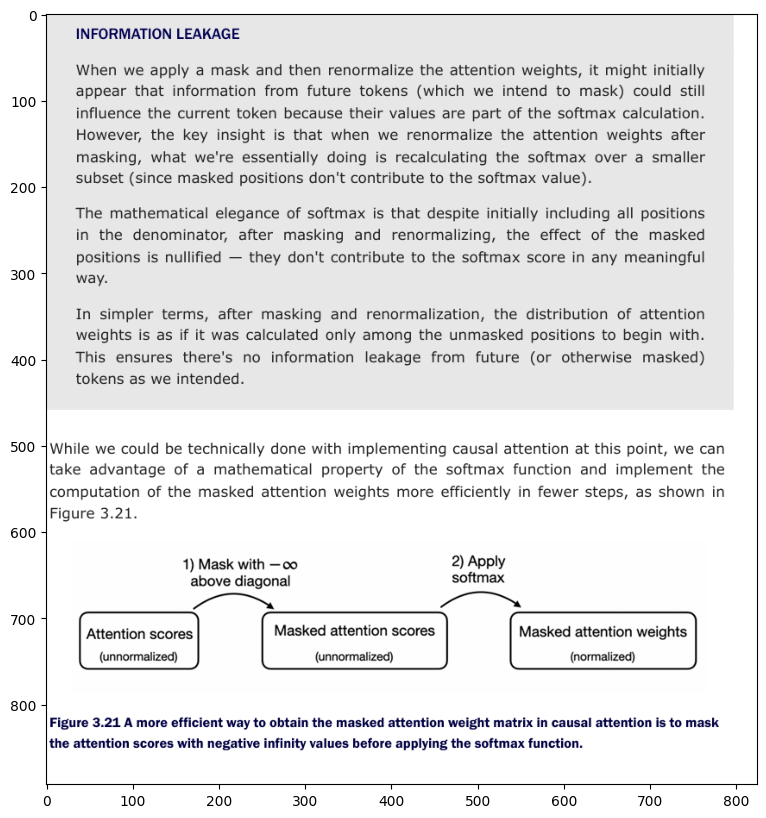

In [38]:
plt.figure(figsize=(12,10))
img=plt.imread("images/Screenshot 2025-09-30 162358.png")
plt.imshow(img)

A more efficient way to implement the casuaal self attention mask to the attention scores 

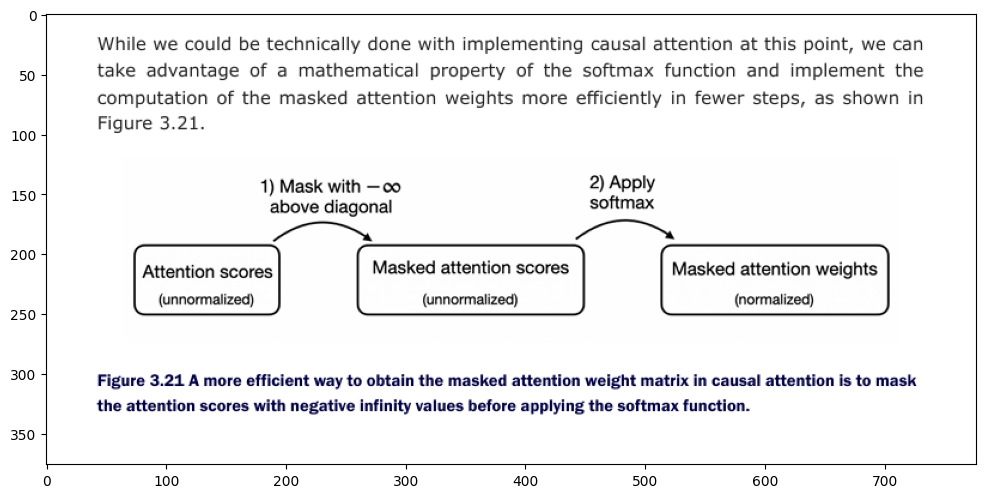

In [39]:
plt.figure(figsize=(12,10))
img=plt.imread("images/5.png")
plt.imshow(img)

In [40]:
mask = torch.triu(torch.ones(context_length, context_length), diagonal=1)
#torch.triuReturns the upper triangular part of a matrix (2-D tensor) or batch of matrices input, the other elements of the result tensor out are set to 0.
print("Mask :\n", mask)
masked = attn_scores.masked_fill(mask.bool(), -torch.inf)
print("Masked Attention Scores:\n", masked)

Mask :
 tensor([[0., 1., 1., 1., 1., 1.],
        [0., 0., 1., 1., 1., 1.],
        [0., 0., 0., 1., 1., 1.],
        [0., 0., 0., 0., 1., 1.],
        [0., 0., 0., 0., 0., 1.],
        [0., 0., 0., 0., 0., 0.]])
Masked Attention Scores:
 tensor([[0.2899,   -inf,   -inf,   -inf,   -inf,   -inf],
        [0.4656, 0.1723,   -inf,   -inf,   -inf,   -inf],
        [0.4594, 0.1703, 0.1731,   -inf,   -inf,   -inf],
        [0.2642, 0.1024, 0.1036, 0.0186,   -inf,   -inf],
        [0.2183, 0.0874, 0.0882, 0.0177, 0.0786,   -inf],
        [0.3408, 0.1270, 0.1290, 0.0198, 0.1290, 0.0078]],
       grad_fn=<MaskedFillBackward0>)


In [41]:
# Now according to the third step in the above image we have to apply softmax to the unnormalized attention scores
attn_weights=torch.softmax(masked/keys.shape[-1]**0.5,dim=1)
print(attn_weights)
# now these modified attention weights can be used to get the context vectors

tensor([[1.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000],
        [0.5517, 0.4483, 0.0000, 0.0000, 0.0000, 0.0000],
        [0.3800, 0.3097, 0.3103, 0.0000, 0.0000, 0.0000],
        [0.2758, 0.2460, 0.2462, 0.2319, 0.0000, 0.0000],
        [0.2175, 0.1983, 0.1984, 0.1888, 0.1971, 0.0000],
        [0.1935, 0.1663, 0.1666, 0.1542, 0.1666, 0.1529]],
       grad_fn=<SoftmaxBackward0>)


In [42]:
Context_vectors=attn_weights@values
Context_vectors

tensor([[-0.0872,  0.0286],
        [-0.0991,  0.0501],
        [-0.0999,  0.0633],
        [-0.0983,  0.0489],
        [-0.0514,  0.1098],
        [-0.0754,  0.0693]], grad_fn=<MmBackward0>)

In [43]:
# In next section we first cover another minor tweak to the causal attention mechanism that is useful for
#  reducing overfitting when training LLMs.
# Masking additional attention weights with dropout
#  In the following code example, we use a dropout rate of 50%, which means masking out
#  half of the attention weights. (When we train the GPT model in later chapters, we will use a
#  lower dropout rate, such as 0.1 or 0.2.)

In [44]:
"""
When dropout is applied with probability p=0.5:
50% values are randomly set to zero and to compensate the remaining values are scaled up by a factor of 1/(1-p)=2
During training: Each element is randomly kept with probability (1-p) = 0.5
The kept elements are scaled up by a factor of 1/(1-p) = 1/0.5 = 2
"""

torch.manual_seed(123)
dropout=torch.nn.Dropout(0.5)
print(dropout)

example=torch.ones(6,6)
print(example)
print(dropout(example))

Dropout(p=0.5, inplace=False)
tensor([[1., 1., 1., 1., 1., 1.],
        [1., 1., 1., 1., 1., 1.],
        [1., 1., 1., 1., 1., 1.],
        [1., 1., 1., 1., 1., 1.],
        [1., 1., 1., 1., 1., 1.],
        [1., 1., 1., 1., 1., 1.]])
tensor([[2., 2., 0., 2., 2., 0.],
        [0., 0., 0., 2., 0., 2.],
        [2., 2., 2., 2., 0., 2.],
        [0., 2., 2., 0., 0., 2.],
        [0., 2., 0., 2., 0., 2.],
        [0., 2., 2., 2., 2., 0.]])


In [45]:
# Now lets apply the dropout to the attention weights matrix
torch.manual_seed(123)
print(dropout(attn_weights))

tensor([[2.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000],
        [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000],
        [0.7599, 0.6194, 0.6206, 0.0000, 0.0000, 0.0000],
        [0.0000, 0.4921, 0.4925, 0.0000, 0.0000, 0.0000],
        [0.0000, 0.3966, 0.0000, 0.3775, 0.0000, 0.0000],
        [0.0000, 0.3327, 0.3331, 0.3084, 0.3331, 0.0000]],
       grad_fn=<MulBackward0>)


Implementing a compact casual attention class 

In [46]:
# torch.stack((inputs, inputs), dim=0) creates a batch by stacking the same inputs tensor twice along dimension 0.
batch=torch.stack((inputs,inputs),dim=0)
print(batch)
print(batch.shape)

tensor([[[0.4300, 0.1500, 0.8900],
         [0.5500, 0.8700, 0.6600],
         [0.5700, 0.8500, 0.6400],
         [0.2200, 0.5800, 0.3300],
         [0.7700, 0.2500, 0.1000],
         [0.0500, 0.8000, 0.5500]],

        [[0.4300, 0.1500, 0.8900],
         [0.5500, 0.8700, 0.6600],
         [0.5700, 0.8500, 0.6400],
         [0.2200, 0.5800, 0.3300],
         [0.7700, 0.2500, 0.1000],
         [0.0500, 0.8000, 0.5500]]])
torch.Size([2, 6, 3])


In [68]:
"""

class CasualAttention(nn.module):
def init(self, d_in,d_out,context_length,dropout,qkv_bias=False):
super().init()
self.d_out=d_out
self.W_query = nn.Linear(d_in, d_out, bias=qkv_bias)
self.W_key = nn.Linear(d_in, d_out, bias=qkv_bias)
self.W_value = nn.Linear(d_in, d_out, bias=qkv_bias)
self.dropout = nn.Dropout(dropout)
self.register_buffer("mask", torch.tril(torch.ones(context_length, context_length)))

In the nn.Linear layer, the bias parameter controls whether to include a bias term in the linear transformation.

What is bias in neural networks?
A linear layer performs: output = input × weight + bias

Without bias (bias=False): output = input × weight
With bias (bias=True): output = input × weight + bias
What is qkv_bias?
qkv_bias is a parameter that controls whether to add bias terms to the Query, Key, and Value projections in the attention mechanism.

qkv_bias=False (default in your code): No bias added to Q, K, V projections
qkv_bias=True: Bias terms are added to Q, K, V projections
Why is qkv_bias typically False in attention?
In most Transformer implementations (including the original "Attention is All You Need" paper), bias terms are omitted from the Q, K, V projections because:

Mathematical equivalence: The attention mechanism can achieve the same expressiveness without bias
Reduced parameters: Fewer parameters to train
Empirical performance: Models often perform just as well or better without bias in attention
"""

"""
Without super().__init__(), your class would break because:

Parameters wouldn't be registered properly
model.parameters() wouldn't work
model.to(device) wouldn't work
Model saving/loading would fail
"""
class CausalAttention(nn.Module):
    def __init__(self, d_in,d_out,context_length,dropout,qkv_bias=False):
        super().__init__()
        self.d_out=d_out
        self.W_query = nn.Linear(d_in, d_out, bias=qkv_bias)
        self.W_key = nn.Linear(d_in, d_out, bias=qkv_bias)
        self.W_value = nn.Linear(d_in, d_out, bias=qkv_bias)
        self.dropout = nn.Dropout(dropout)
        # self.register_buffer ->Register the causal mask as a buffer
        # - Automatically moves with model.to(device)
        # - Saved/loaded with model state
        # - Always on same device as model parameters
        self.register_buffer("mask", torch.triu(torch.ones(context_length, context_length),diagonal=1))


    def forward(self,x):
        b,num_tokens,d_in=x.shape
        keys = self.W_key(x)
        queries=self.W_query(x)
        values=self.W_value(x)

        attn_scores=queries@keys.transpose(1,2)
        attn_scores.masked_fill_(self.mask.bool()[:num_tokens,:num_tokens],-torch.inf)
        attn_weights=torch.softmax(attn_scores/keys.shape[-1]**0.5,dim=-1)
        attn_weights=self.dropout(attn_weights)
        context_vec=attn_weights@values
        return context_vec

In [69]:
torch.manual_seed(123)
context_length=batch.shape[1]#batch here is the stacked input tensor of shape (2, 6, 3) means the same input tensor is twice stacked one after another so it become a batch of 2 
ca=CausalAttention(d_in,d_out,context_length,0.0)
Context_vecs=ca(batch)

# Without causal masking - Model can "cheat" by looking at future tokens
# Sentence: "The cat sat on the"
# When predicting "sat", model can see "on the" → unrealistic!

# With causal masking - Model only sees past/current tokens
# When predicting "sat", model only sees "The cat" → realistic!

LETS NOW IMPLEMENT MULTI HEAD ATTENTION BY APPLYING THIS CASUAL ATTENTION CLASS OVER MULTIPLE HEADS 

In [70]:
# Stacking multiple single head attention layers
# In practice, LLMs use multiple attention heads in parallel to capture different types of relationships
# Multiple Single head attention layers are stacked in parallel to form a multi-head attention mechanism.
# Each head has its own set of trainable weight matrices (Wq, Wk,Wv)

class MultiHeadAttentionWrapper(nn.Module):
    def __init__(self, d_in, d_out, context_length, dropout, num_heads, qkv_bias=False):
        super().__init__()
        self.heads = nn.ModuleList([CausalAttention(d_in, d_out, context_length, dropout, qkv_bias)
        for _ in range(num_heads)]
        )

    def forward(self, x):
        return torch.cat([head(x) for head in self.heads], dim=-1)
"""
Explanation of the forward method in MultiHeadAttention:
[head(x) for head in self.heads] - List comprehension that:

Takes the input x
Passes it through each attention head separately
Each head processes the same input but with different weight matrices
Returns a list of outputs from all heads
torch.cat(..., dim=-1) - Concatenates all head outputs along the last dimension
"""

'\nExplanation of the forward method in MultiHeadAttention:\n[head(x) for head in self.heads] - List comprehension that:\n\nTakes the input x\nPasses it through each attention head separately\nEach head processes the same input but with different weight matrices\nReturns a list of outputs from all heads\ntorch.cat(..., dim=-1) - Concatenates all head outputs along the last dimension\n'

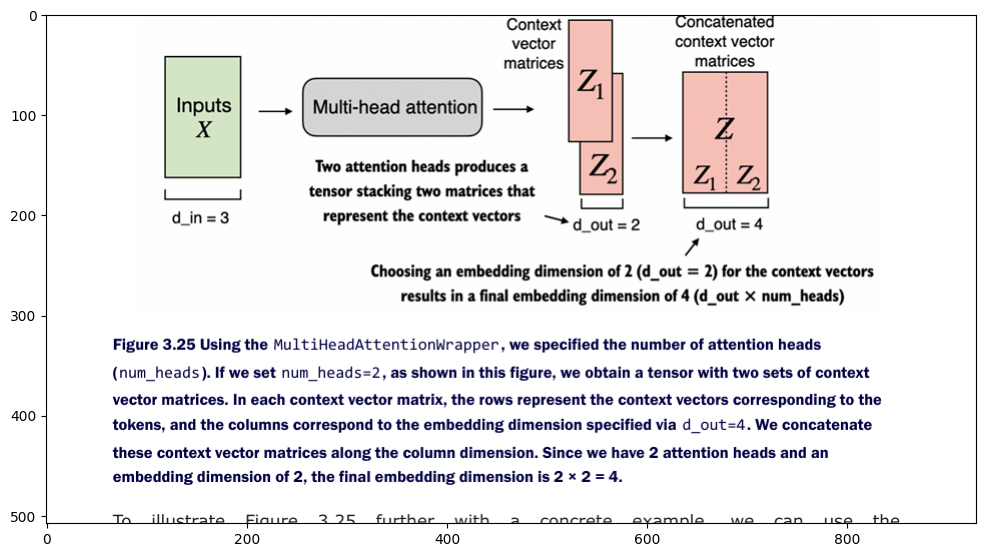

In [71]:

# if we use this MultiHeadAttentionWrapper class with two attention heads (via
#  num_heads=2) and CausalAttention output dimension d_out=2, this results in a 4
# dimensional context vectors (d_out*num_heads=4) shown next
plt.figure(figsize=(12,10))
plt.imshow(plt.imread("D:\LLM From Scratch\images\Screenshot 2025-10-01 231046.png"))
plt.show()

In [ ]:
torch.manual_seed(123)
context_length=batch.shape[1]
mha=MultiHeadAttentionWrapper(d_in,d_out,context_length,dropout=0.0,num_heads=2)
d_in=3
d_out=1
context_vecs=mha(batch)
print(context_vecs)
print("Shape of context vectors from multi-head attention:", context_vecs.shape)

tensor([[[-0.4519,  0.2216,  0.4772,  0.1063],
         [-0.5874,  0.0058,  0.5891,  0.3257],
         [-0.6300, -0.0632,  0.6202,  0.3860],
         [-0.5675, -0.0843,  0.5478,  0.3589],
         [-0.5526, -0.0981,  0.5321,  0.3428],
         [-0.5299, -0.1081,  0.5077,  0.3493]],

        [[-0.4519,  0.2216,  0.4772,  0.1063],
         [-0.5874,  0.0058,  0.5891,  0.3257],
         [-0.6300, -0.0632,  0.6202,  0.3860],
         [-0.5675, -0.0843,  0.5478,  0.3589],
         [-0.5526, -0.0981,  0.5321,  0.3428],
         [-0.5299, -0.1081,  0.5077,  0.3493]]], grad_fn=<CatBackward0>)
Shape of context vectors from multi-head attention: torch.Size([2, 6, 4])


Only See the output of next cell to understand the differnce between the use of triu and tril 

In [76]:
import torch
import torch.nn as nn
print("triu is preferred because it's more efficient and numerically stable!")
print("==="*40)
print("Comparing two methods for causal attention masking:")
# Sample attention scores
attn_scores = torch.randn(6, 6)
print("Original attention scores:")
print(attn_scores)

print("\n" + "="*50)

# METHOD 1: Using tril (Lower triangular)
print("METHOD 1: Using torch.tril")
keep_mask = torch.tril(torch.ones(6, 6))
print("Keep mask (tril):")
print(keep_mask)

# Apply softmax first, then mask
attn_weights_method1 = torch.softmax(attn_scores, dim=-1)
masked_weights = attn_weights_method1 * keep_mask
# Renormalize
row_sums = masked_weights.sum(dim=-1, keepdim=True)
final_weights_method1 = masked_weights / row_sums
print("Final weights (Method 1):")
print(final_weights_method1)

print("\n" + "="*50)

# METHOD 2: Using triu (Upper triangular)
print("METHOD 2: Using torch.triu")
block_mask = torch.triu(torch.ones(6, 6), diagonal=1)
print("Block mask (triu):")
print(block_mask)

# Mask BEFORE softmax
masked_scores = attn_scores.masked_fill(block_mask.bool(), -torch.inf)
print("Masked scores (-inf for future):")
print(masked_scores)

final_weights_method2 = torch.softmax(masked_scores, dim=-1)
print("Final weights (Method 2):")
print(final_weights_method2)

print("\n" + "="*50)
print("Are results the same?", torch.allclose(final_weights_method1, final_weights_method2, atol=1e-6))
# Method 1 problems:
# ❌ Two-step process (softmax → mask → renormalize)
# ❌ Numerical instability from division
# ❌ More computation

# Method 2 advantages:
# ✅ One-step process (mask → softmax)
# ✅ Numerically stable (-inf handled properly by softmax)
# ✅ More efficient
# ✅ Standard practice in transformers

triu is preferred because it's more efficient and numerically stable!
Comparing two methods for causal attention masking:
Original attention scores:
tensor([[-0.9797, -2.1126, -0.2721, -0.3510,  1.1152, -0.6172],
        [-2.2708, -1.3819,  1.1721, -0.4372, -0.4053,  0.7086],
        [ 0.9533, -0.0130, -0.1301, -0.0877, -0.0673,  0.2467],
        [-0.9392, -1.0448, -0.5878, -1.1506,  1.0164,  0.1234],
        [ 0.0526, -1.1892,  0.6751, -0.5757, -1.4355,  0.0727],
        [ 0.1053, -1.0311, -0.4780,  0.7995,  0.9905, -0.0730]])

METHOD 1: Using torch.tril
Keep mask (tril):
tensor([[1., 0., 0., 0., 0., 0.],
        [1., 1., 0., 0., 0., 0.],
        [1., 1., 1., 0., 0., 0.],
        [1., 1., 1., 1., 0., 0.],
        [1., 1., 1., 1., 1., 0.],
        [1., 1., 1., 1., 1., 1.]])
Final weights (Method 1):
tensor([[1.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000],
        [0.2913, 0.7087, 0.0000, 0.0000, 0.0000, 0.0000],
        [0.5818, 0.2213, 0.1969, 0.0000, 0.0000, 0.0000],
        [0.2421